# Códigos realizados para la relación de ejercicios

#### El código del problema 3 del juego de la vida se encuentra en el repositorio programado en Matlab (Octave), al igual que el modelo de Hopfield del problema 26, que está programado en Fortran (tuve que simularlos hace tiempo).

## Problema 1: Atractor de Lorentz

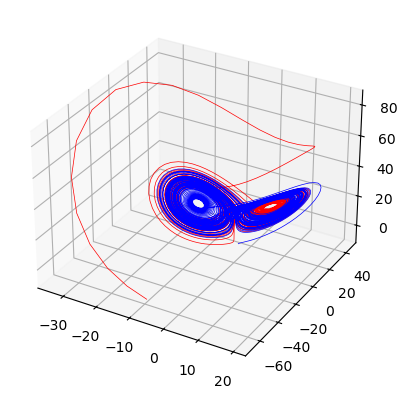

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    x, y, z = state  # Desempaqueta el vector de estado
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivadas

state0 = [-10.0, -58, -10.0]
state1 = [1.01, 1.01, 1.01]
t = np.arange(0.0, 60, 0.01)

states = odeint(f, state0, t)
states1 = odeint(f, state1, t)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(states[:, 0], states[:, 1], states[:, 2], color='red', lw=0.5)
ax.plot(states1[:, 0], states1[:, 1], states1[:, 2], color='blue', lw=0.5)
plt.show()

## Problema 2: Atractor de Rössler

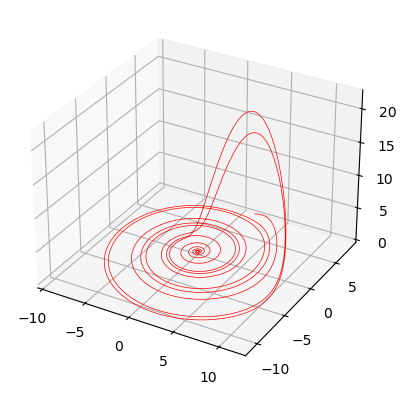

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

# Parámetros 
a = 0.2
b = 0.2
c = 5.7

def rossler(state, t):
    x, y, z = state
    dx = -y - z
    dy = x + a * y
    dz = b + z * (x - c)
    return dx, dy, dz

# Condición inicial
state0 = [0.1, 0.0, 0.0]
state1 = [0.101, 0.001, 0.001]


t = np.arange(0.0, 80, 0.01)
trajectory = odeint(rossler, state0, t)
trajectory1 = odeint(rossler, state1, t)

# Representación
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], color='red', lw=0.5)
#ax.plot(trajectory1[:, 0], trajectory1[:, 1], trajectory1[:, 2], color='blue', lw=0.5)

#ax.set_xlabel('x')
#ax.set_ylabel('y')
#ax.set_zlabel('z')
#ax.set_title('Atractor de Rössler (a=0.2, b=0.2, c=5.7)')

plt.show()


## Problema 4: Modelo de pila de arena BTW

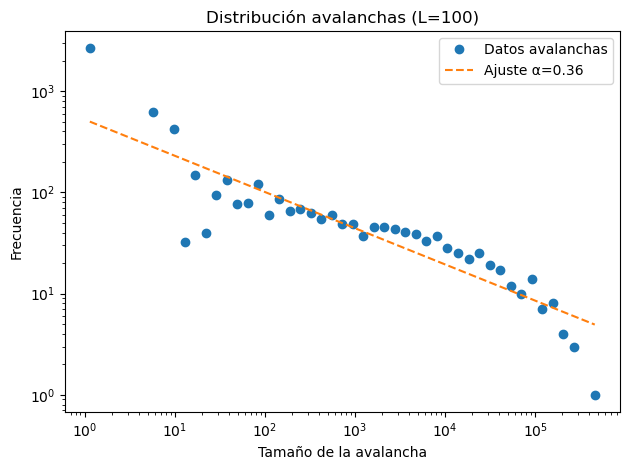

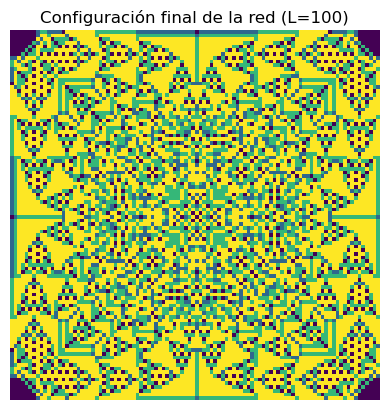

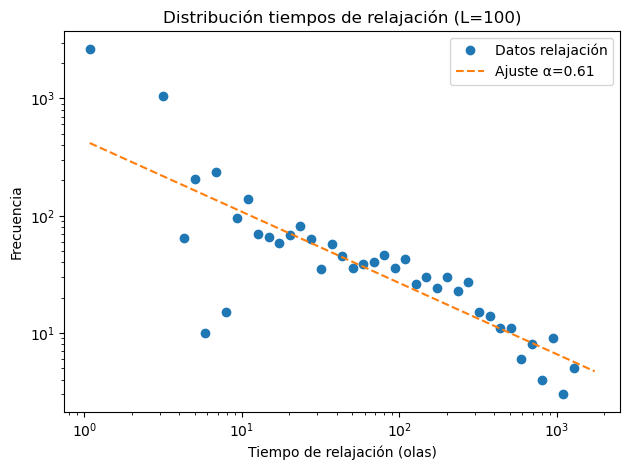

Exponente avalanchas (regresión): α_s = 0.36
Exponente relajación (regresión): α_r = 0.61


In [100]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from collections import deque

L = 100             # tamaño de la red L×L
n_steps = 22000   # número de granos a añadir( no se pueden añadir más de los granos que 
                  #caben en los bordes de la pila, se puede mejorar con condiciones de contorno)

# Inicialización
z = np.zeros((L, L), dtype=int)
tamaño_avalanchas = []
tiempos_relajacion = []

vecinos = [(1,0), (-1,0), (0,1), (0,-1)]
i0 = j0 = L // 2  # centro de la red

# Simulación 
for _ in range(n_steps):
    z[i0, j0] += 1
    tamaño = 0
    t = 0
    current = [(i0, j0)] if z[i0, j0] > 3 else []
    while current:
        olas = []
        t += 1  # cada ola cuenta como un paso de relajación
        for x, y in current:
            if z[x, y] > 3:
                z[x, y] -= 4
                tamaño += 1
                for dx, dy in vecinos:
                    nx, ny = (x + dx) % L, (y + dy) % L
                    z[nx, ny] += 1
                    if z[nx, ny] == 4:
                        olas.append((nx, ny))
        current = olas

    tamaño_avalanchas.append(tamaño)
    tiempos_relajacion.append(t)

# Filtrar avalanchas no triviales
tamaños = np.array(tamaño_avalanchas)
tamaños = tamaños[tamaños > 0]
tiempos_relajacion = np.array(tiempos_relajacion)[np.array(tamaño_avalanchas) > 0]

# Ajuste exponente para avalancha (regresión)
counts_s, bins_s = np.histogram(tamaños, bins=np.logspace(0, np.log10(tamaños.max()), 50))
centers_s = np.sqrt(bins_s[:-1] * bins_s[1:])
mask_s = counts_s > 0
log_xs = np.log(centers_s[mask_s])
log_ys = np.log(counts_s[mask_s])
slope_s, intercept_s, *_ = stats.linregress(log_xs, log_ys)
alpha_s = -slope_s

# 1) Distribución de tamaños (log-log ajuste)
plt.figure()
plt.loglog(centers_s, counts_s, marker='o', linestyle='none', label='Datos avalanchas')
fit_s = np.exp(intercept_s) * centers_s**slope_s
plt.loglog(centers_s, fit_s, linestyle='--', label=f'Ajuste α={alpha_s:.2f}')
plt.xlabel('Tamaño de la avalancha')
plt.ylabel('Frecuencia')
plt.title(f'Distribución avalanchas (L={L})')
plt.legend()
plt.tight_layout()
plt.show()

# 2) Representación de la configuración final de la red
plt.figure()
plt.imshow(z, interpolation='nearest')
plt.title(f'Configuración final de la red (L={L})')
plt.axis('off')
plt.show()

# Ajuste exponente para tiempos de relajación (regresión)
counts_r, bins_r = np.histogram(tiempos_relajacion, bins=np.logspace(0, np.log10(tiempos_relajacion.max()), 50))
centers_r = np.sqrt(bins_r[:-1] * bins_r[1:])
mask_r = counts_r > 0
log_xr = np.log(centers_r[mask_r])
log_yr = np.log(counts_r[mask_r])
slope_r, intercept_r, *_ = stats.linregress(log_xr, log_yr)
alpha_r = -slope_r

# 3) Distribución de tiempos de relajación (log-log scatter + ajuste)
plt.figure()
plt.loglog(centers_r, counts_r, marker='o', linestyle='none', label='Datos relajación')
fit_r = np.exp(intercept_r) * centers_r**slope_r
plt.loglog(centers_r, fit_r, linestyle='--', label=f'Ajuste α={alpha_r:.2f}')
plt.xlabel('Tiempo de relajación (olas)')
plt.ylabel('Frecuencia')
plt.title(f'Distribución tiempos de relajación (L={L})')
plt.legend()
plt.tight_layout()
plt.show()

# Mostrar exponentes
print(f'Exponente avalanchas (regresión): α_s = {alpha_s:.2f}')
print(f'Exponente relajación (regresión): α_r = {alpha_r:.2f}')


## Problema 5: Exponente de Lyapunov en el mapa logístico

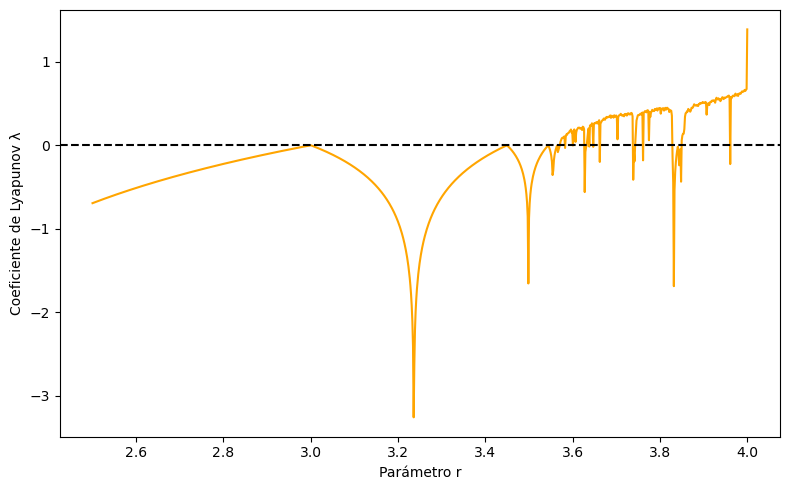

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
r_values = np.linspace(2.5, 4.0, 1000)
n_t= 1000
n_iter = 1000
lyap = np.zeros_like(r_values)

# Cálculo del exponente de Lyapunov para cada valor de r
for i, r in enumerate(r_values):
    x = 0.5  # Condición inicial
    for _ in range(n_t):
        x = r * x * (1 - x)
    # Cálculo del exponente
    sum_log = 0.0
    for _ in range(n_iter):
        x = r * x * (1 - x)
        sum_log += np.log(abs(r * (1 - 2 * x)))
    lyap[i] = sum_log / n_iter

# Representación gráfica
plt.figure(figsize=(8, 5))
plt.plot(r_values, lyap, color='orange')
plt.axhline(0, linestyle='--', color='black')
plt.xlabel('Parámetro r')
plt.ylabel('Coeficiente de Lyapunov λ')
#plt.title('Exponente de Lyapunov del mapa logístico')
plt.tight_layout()
plt.show()


## Problema 17: Red WS 

In [1]:
import networkx as nx
import pandas as pd
import numpy as np

# Parámetros
N = 300
k = 4
p = 0.1
runs = 50  # número de realizaciones para promediar


cl_ws_list, cl_nw_list = [], []
lp_ws_list, lp_nw_list = [], []
freq_ws_list, freq_nw_list = [], []

for _ in range(runs):
    # Generar redes
    G_ws = nx.watts_strogatz_graph(N, k, p)
    G_nw = nx.newman_watts_strogatz_graph(N, k, p)
    
    # redes conexas
    if not nx.is_connected(G_ws):
        G_ws = G_ws.subgraph(max(nx.connected_components(G_ws), key=len)).copy()
    if not nx.is_connected(G_nw):
        G_nw = G_nw.subgraph(max(nx.connected_components(G_nw), key=len)).copy()
    
    # clustering y path length
    cl_ws_list.append(nx.average_clustering(G_ws))
    cl_nw_list.append(nx.average_clustering(G_nw))
    lp_ws_list.append(nx.average_shortest_path_length(G_ws))
    lp_nw_list.append(nx.average_shortest_path_length(G_nw))
    
    # Distribuciones de grados normalizadas
    deg_ws = pd.Series(dict(G_ws.degree())).value_counts().sort_index() / G_ws.number_of_nodes()
    deg_nw = pd.Series(dict(G_nw.degree())).value_counts().sort_index() / G_nw.number_of_nodes()
    freq_ws_list.append(deg_ws)
    freq_nw_list.append(deg_nw)

# Promediar clustering y l medio
summary = pd.DataFrame({
    'Red': ['WS recableado', 'NW atajos'],
    'C medio': [np.mean(cl_ws_list), np.mean(cl_nw_list)],
    'C std':  [np.std(cl_ws_list),  np.std(cl_nw_list)],
    'l medio':[np.mean(lp_ws_list), np.mean(lp_nw_list)],
    'l std': [np.std(lp_ws_list),  np.std(lp_nw_list)],
})

# Promediar distribuciones de grados
df_freq_ws = pd.concat(freq_ws_list, axis=1).fillna(0).mean(axis=1)
df_freq_nw = pd.concat(freq_nw_list, axis=1).fillna(0).mean(axis=1)
grados = sorted(set(df_freq_ws.index) | set(df_freq_nw.index))

df_grado = pd.DataFrame({
    'Grado': grados,
    'freq WS': [df_freq_ws.get(d, 0) for d in grados],
    'freq NW': [df_freq_nw.get(d, 0) for d in grados],
})

# Mostrar resultados
print("Distribución de grados promediada ({} runs):".format(runs))
print(df_grado.to_string(index=False))

print("\nResumen de métricas estructurales promediadas ({} runs):".format(runs))
print(summary.to_string(index=False))


Distribución de grados promediada (50 runs):
 Grado  freq WS  freq NW
     2 0.007067 0.000000
     3 0.151933 0.000000
     4 0.690933 0.653000
     5 0.135000 0.289800
     6 0.014200 0.051067
     7 0.000800 0.005800
     8 0.000067 0.000333

Resumen de métricas estructurales promediadas (50 runs):
          Red  C medio    C std  l medio    l std
WS recableado 0.373195 0.017377 6.856789 0.307226
    NW atajos 0.425959 0.008612 6.339229 0.345469


## Problema 21: Modelo Hodgkin-Huxley

Oscilaciones aparecen por primera vez en I ≈ 7 μA/cm²
Y cesan por última vez en   I ≈ 153 μA/cm²


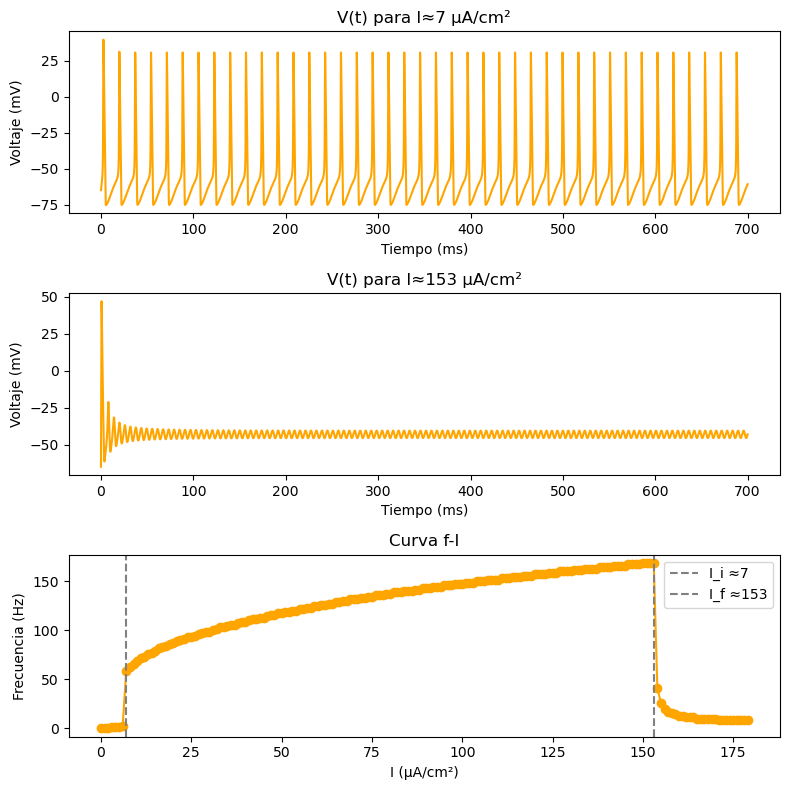

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import find_peaks

# Parámetros 
C_m = 1.0; g_Na = 120; g_K = 36; g_L = 0.3
E_Na = 50; E_K = -77; E_L = -54.402

def alpha_m(V): return 0.1*(V+40)/(1-np.exp(-0.1*(V+40)))
def beta_m(V):  return 4*np.exp(-0.0556*(V+65))
def alpha_h(V): return 0.07*np.exp(-0.05*(V+65))
def beta_h(V):  return 1/(1+np.exp(-0.1*(V+35)))
def alpha_n(V): return 0.01*(V+55)/(1-np.exp(-0.1*(V+55)))
def beta_n(V):  return 0.125*np.exp(-0.0125*(V+65))

# Ecuaciones
def dALLdt(X, t, I_ext):
    V, m, h, n = X
    I_Na = g_Na * m**3 * h * (V - E_Na)
    I_K  = g_K  * n**4       * (V - E_K)
    I_L  = g_L              * (V - E_L)
    return [(I_ext - I_Na - I_K - I_L)/C_m,
            alpha_m(V)*(1-m) - beta_m(V)*m,
            alpha_h(V)*(1-h) - beta_h(V)*h,
            alpha_n(V)*(1-n) - beta_n(V)*n]

# Condición inicial de reposo
V0 = -65
m0 = alpha_m(V0)/(alpha_m(V0)+beta_m(V0))
h0 = alpha_h(V0)/(alpha_h(V0)+beta_h(V0))
n0 = alpha_n(V0)/(alpha_n(V0)+beta_n(V0))
X0 = [V0, m0, h0, n0]

# Barrido de corrientes
I_vals = np.arange(0, 180, 1)
rates = []
t = np.linspace(0, 700, 20001)  # ms

for I in I_vals:
    sol = odeint(dALLdt, X0, t, args=(I,))
    V = sol[:,0]
    #funcion que busca los picos
    spikes, _ = find_peaks(V, height=-41) 
    rates.append(len(spikes)/(t[-1]/1000))  # Hz

rates = np.array(rates)

#detectar el rango de corritentes donde aparecen oscilaciones
idx = np.where(rates > 50)[0]
I_first = I_vals[idx[0]]
I_last  = I_vals[idx[-1]]

print(f"Oscilaciones aparecen por primera vez en I ≈ {I_first} μA/cm²")
print(f"Y cesan por última vez en   I ≈ {I_last} μA/cm²")

# Graficar
fig, (ax1,ax3, ax2) = plt.subplots(3,1, figsize=(8,8))

# 1) V(t) cerca de umbral
sol_thr = odeint(dALLdt, X0, t, args=(I_first,))
ax1.plot(t, sol_thr[:,0],  color='orange')
ax1.set_title(f'V(t) para I≈{I_first} μA/cm²')
ax1.set_xlabel('Tiempo (ms)')
ax1.set_ylabel('Voltaje (mV)')
# 1) V(t) cerca de umbral
sol_thr = odeint(dALLdt, X0, t, args=(I_last,))
ax3.plot(t, sol_thr[:,0],  color='orange')
ax3.set_title(f'V(t) para I≈{I_last} μA/cm²')
ax3.set_xlabel('Tiempo (ms)')
ax3.set_ylabel('Voltaje (mV)')

# 2) Curva f-I
ax2.plot(I_vals, rates, 'o-', color='orange')
ax2.axvline(I_first, color='grey', linestyle='--', label=f'I_i ≈{I_first}')
ax2.axvline(I_last, color='grey', linestyle='--', label=f'I_f ≈{I_last}')
ax2.set_title('Curva f-I')
ax2.set_xlabel('I (μA/cm²)')
ax2.set_ylabel('Frecuencia (Hz)')
ax2.legend()

plt.tight_layout()
plt.show()



## Problema 22: Modelo reducido HH

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

#Parámetros
C   = 1.0      # µF/cm²
gNa = 120.0    # mS/cm²
gK  = 36.0     # mS/cm²
gL  = 0.3      # mS/cm²
ENa = 50.0     # mV
EK  = -77.0    # mV
EL  = -54.4  # mV

#definiciones de funciones
def alpha_m(V):
    x = V + 40.0
    if abs(x) < 1e-6:
        return 0.1 * 10.0  # límite de Taylor: (0.1*x)/(1-exp(-x/10)) → 1.0
    return 0.1 * x / (1.0 - np.exp(-x/10.0))

def beta_m(V): return 4.0 * np.exp(-(V + 65.0) / 18.0)
def alpha_h(V): return 0.07 * np.exp(-(V + 65.0) / 20.0)
def beta_h(V): return 1.0 / (1.0 + np.exp(-(V + 35.0) / 10.0))
def alpha_n(V):
    x = V + 55.0
    if abs(x) < 1e-6:
        return 0.01 * 10.0  # límite de Taylor: (0.01*x)/(1-exp(-x/10)) → 0.1
    return 0.01 * x / (1.0 - np.exp(-x/10.0))

def beta_n(V): return 0.125 * np.exp(-(V + 65.0) / 80.0)

def m_inf(V):
    a, b = alpha_m(V), beta_m(V)
    return a / (a + b)

def h_inf(V):
    a, b = alpha_h(V), beta_h(V)
    return a / (a + b)

def n_inf(V):
    a, b = alpha_n(V), beta_n(V)
    return a / (a + b)

def tau_h(V):
    return 1.0 / (alpha_h(V) + beta_h(V))

def tau_n(V):
    return 1.0 / (alpha_n(V) + beta_n(V))

# f(V,U) 
def f(V, U):
    return (gL * (V - EL)
          + gK * n_inf(U)**4 * (V - EK)
          + gNa * m_inf(V)**3 * h_inf(U) * (V - ENa))

#derivadas parciales 
def dF_dh(V, U):
    return gNa * m_inf(V)**3 * (V - ENa)

def dF_dn(V, U):
    return 4.0 * gK * n_inf(U)**3 * (V - EK)

# Derivadas numéricas de h_inf, n_inf
def dh_inf_dU(U, eps=1e-5):
    return (h_inf(U+eps) - h_inf(U-eps)) / (2*eps)

def dn_inf_dU(U, eps=1e-5):
    return (n_inf(U+eps) - n_inf(U-eps)) / (2*eps)

# g(V,U) con clamp
def g(V, U):
    A = ( dF_dh(V,U) * (h_inf(V) - h_inf(U)) / tau_h(V)
        + dF_dn(V,U) * (n_inf(V) - n_inf(U)) / tau_n(V) )
    B = ( dF_dh(V,U) * dh_inf_dU(U)
        + dF_dn(V,U) * dn_inf_dU(U) )
    # evitar división por cero
    if abs(B) < 1e-8:
        return 0.0
    return A / B

#  Simulación
def simulate_reduced(I_ext, T=300.0, dt=0.01):
    t = np.arange(0.0, T, dt)
    V = np.zeros_like(t)
    U = np.zeros_like(t)
    V[0] = 50.0
    U[0] = -25.0

    for i in range(1, len(t)):
        dV = (-f(V[i-1], U[i-1]) + I_ext) / C
        dU = g(V[i-1], U[i-1])
        V[i] = V[i-1] + dV * dt
        U[i] = U[i-1] + dU * dt

    return t, V, U


# Barrido de corrientes para curva f–I
I_vals = np.arange(0, 300, 1)  # rango de corrientes a explorar
rates = []
T = 300.0    # ms total de simulación para f–I
dt = 0.02    # paso temporal

t_full = np.arange(0.0, T, dt)
for I in I_vals:
    t, V, U = simulate_reduced(I, T=T, dt=dt)
    # contar picos por segundo (umbral de -43 mV para pico)
    peaks, _ = find_peaks(V, height=-43)
    freq = len(peaks) / (T/1000.0)  # Hz
    rates.append(freq)
rates = np.array(rates)

# Determinar umbrales: primera corriente con actividad y última
active_idx = np.where(rates > 5)[0]
I_first = I_vals[active_idx[0]]
I_last  = I_vals[active_idx[-1]]



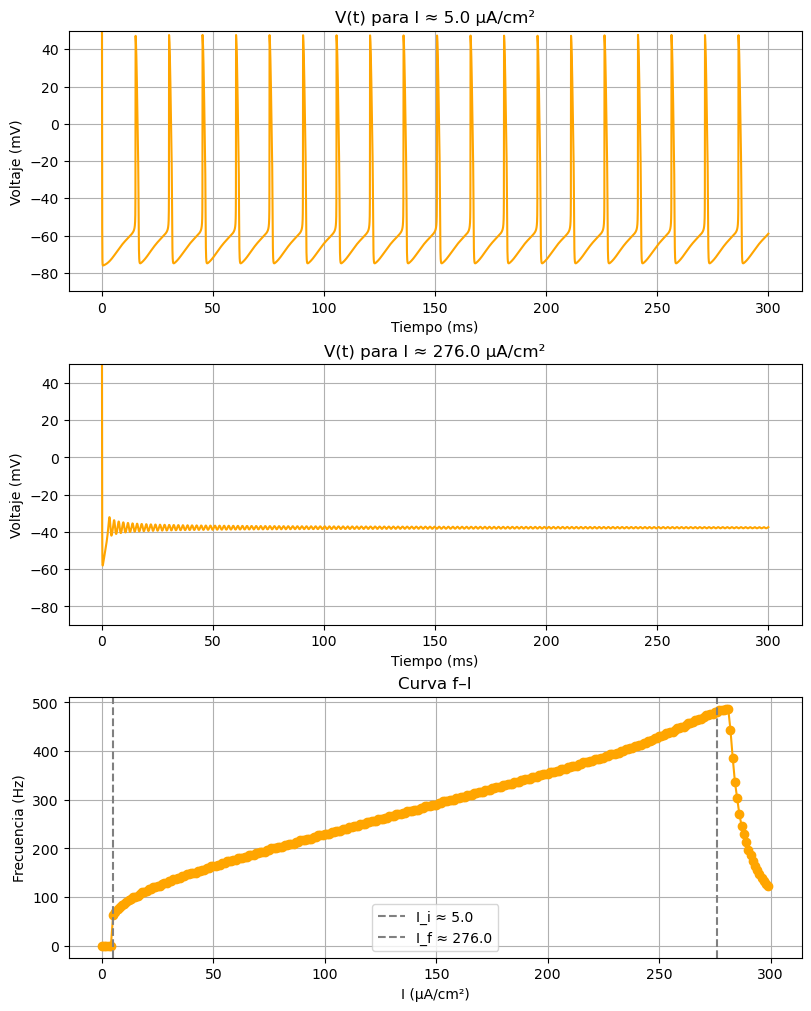

In [5]:
# Crear figura con 3 subplots
fig, (ax1, ax3, ax2) = plt.subplots(3, 1, figsize=(8, 10), constrained_layout=True)
I_last=276.0
I_first=5.0

# 1) V(t) en I_first
t1, V1, _ = simulate_reduced(I_first, T=T, dt=dt)
ax1.plot(t1, V1, color='orange', lw=1.5)
ax1.set_title(f'V(t) para I ≈ {I_first} µA/cm²')
ax1.set_xlabel('Tiempo (ms)')
ax1.set_ylabel('Voltaje (mV)')
ax1.grid(True)
ax1.set_ylim(-90, 50)

# 2) V(t) en I_last
t2, V2, _ = simulate_reduced(I_last, T=T, dt=dt)
ax3.plot(t2, V2, color='orange', lw=1.5)
ax3.set_title(f'V(t) para I ≈ {I_last} µA/cm²')
ax3.set_xlabel('Tiempo (ms)')
ax3.set_ylabel('Voltaje (mV)')
ax3.grid(True)
ax3.set_ylim(-90, 50)

# 3) Curva f–I
ax2.plot(I_vals, rates, 'o-', color='orange')
ax2.axvline(I_first, color='grey', linestyle='--', label=f'I_i ≈ {I_first}')
ax2.axvline(I_last,  color='grey', linestyle='--', label=f'I_f ≈ {I_last}')
ax2.set_title('Curva f–I')
ax2.set_xlabel('I (µA/cm²)')
ax2.set_ylabel('Frecuencia (Hz)')
ax2.legend()
ax2.grid(True)

plt.show()

## Problema 23: Integrar el modelo FN

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Punto de reposo (I=0): V_eq = -1.199, U_eq = -0.624


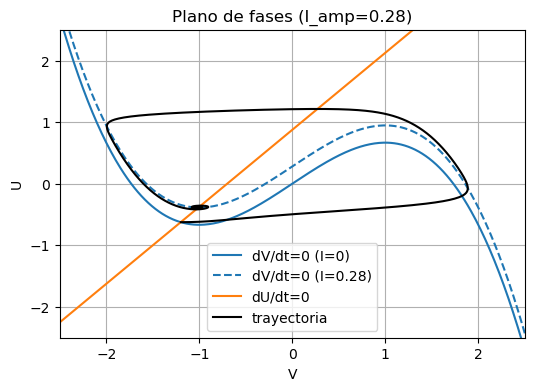

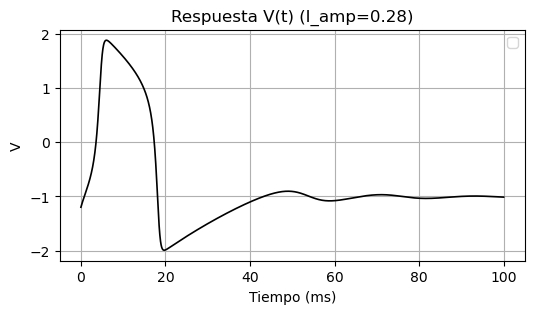

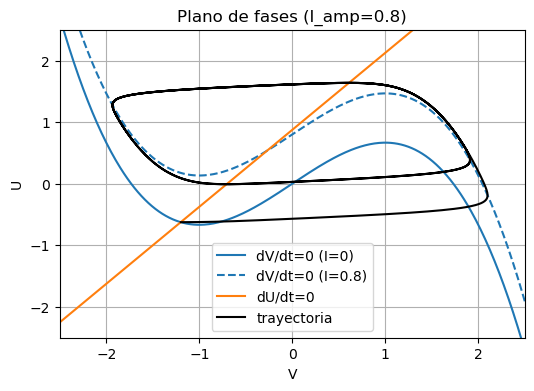

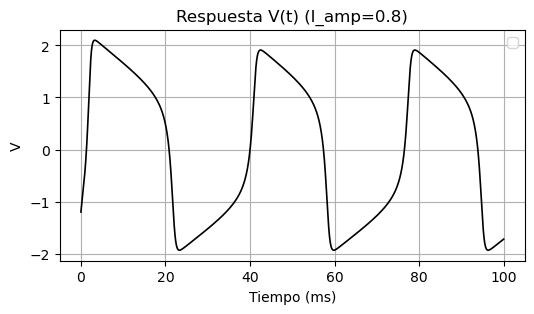

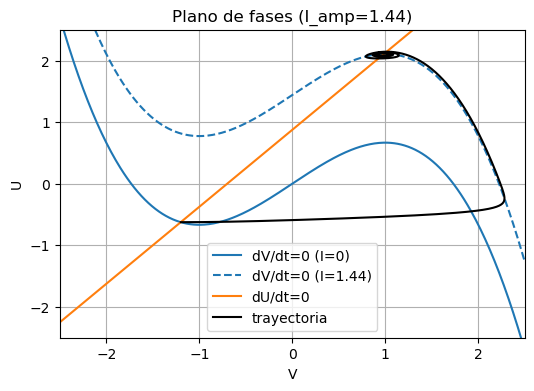

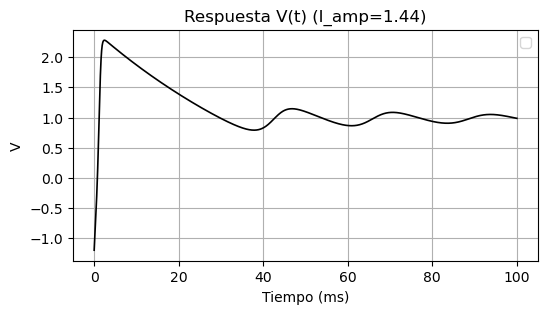

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve

# Parámetros 
a, b, phi = 0.7, 0.8, 0.08

#fn
def fn(X, t, I_ext):
    V, U = X
    I = I_ext(t)
    dV = V - V**3/3 - U + I
    dU = phi * (V + a - b * U)
    return [dV, dU]

# Pulsos rectangulares: amplitud I_amp entre t_on y t_off
def make_pulse(I_amp, t_on, t_off):
    return lambda t: I_amp if (t_on <= t <= t_off) else 0.0

# punto de reposo para I=0
def equilibrio(vars):
    V, U = vars
    return [V - V**3/3 - U, phi*(V + a - b*U)]

V_eq, U_eq = fsolve(equilibrio, [-1, 1])
print(f"Punto de reposo (I=0): V_eq = {V_eq:.3f}, U_eq = {U_eq:.3f}")

#  Pre-simulación sin estímulo para partir de ese reposo
#en la resolucion se ha puesto un pulso desde el principio
t_pre = np.linspace(0, 1000, 5001)   
sol_pre = odeint(fn, [V_eq, U_eq], t_pre, args=(lambda t: 0.0,))
X0 = sol_pre[-1]

# simulación con pulso
t = np.linspace(0, 100, 3001)         
t_on, t_off = 0, 100                 

# Isoclinas 
Vs = np.linspace(-2.5, 2.5, 400)
U_null_V0 = Vs - Vs**3/3              # dV/dt=0 sin pulso (I=0)
U_null_U  = (Vs + a)/b                # dU/dt=0


pulsos = [0.28, 0.8, 1.44]

for I_amp in pulsos:
    I_func = make_pulse(I_amp, t_on, t_off)
    sol = odeint(fn, X0, t, args=(I_func,))
    V, U = sol[:,0], sol[:,1]

    # –––––– Plano de fases
    plt.figure(figsize=(6,4))
    # isoclinas
    plt.plot(Vs, U_null_V0,   'C0',  label='dV/dt=0 (I=0)')
    plt.plot(Vs, U_null_V0+I_amp, 'C0--', label=f'dV/dt=0 (I={I_amp})')
    plt.plot(Vs, U_null_U,    'C1',  label='dU/dt=0')
    # trayectoria
    plt.plot(V, U, 'k', lw=1.5, label='trayectoria')
    #plt.axvline(V_eq, color='gray', lw=1)  # eje de reposo
    #plt.axhline(U_eq, color='gray', lw=1)
    plt.xlim(-2.5,2.5); plt.ylim(-2.5,2.5)
    plt.xlabel('V'); plt.ylabel('U')
    plt.title(f'Plano de fases (I_amp={I_amp})')
    plt.legend(); plt.grid(True)

    # V(t)
    plt.figure(figsize=(6,3))
    plt.plot(t, V, 'k', lw=1.2)
    #plt.axvspan(t_on, t_off, color='gray', alpha=0.3)
    plt.xlabel('Tiempo (ms)'); plt.ylabel('V')
    plt.title(f'Respuesta V(t) (I_amp={I_amp})')
    plt.legend(); plt.grid(True)

plt.show()



## Problema 25: Modelo Tsodyks-Markram

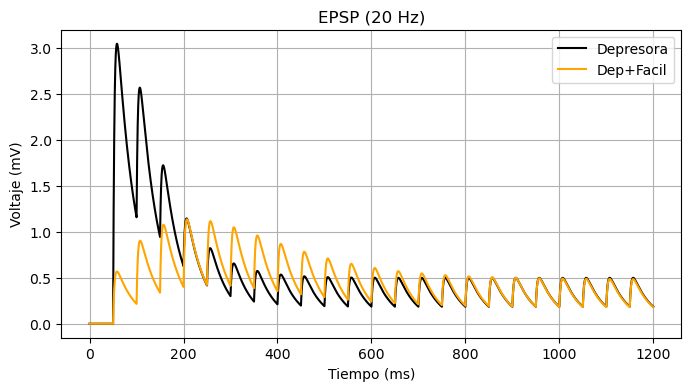

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parametros
dt = 0.1  
T = 1200  
tiempo = np.arange(0, T, dt)
tau_rec = 800.0  
tau_in = 3.0   
U_static = 0.5   
A_SE = 1.0       
tau_fac = 530.0
U_se = 0.05    
tau_m = 40.0    
R_in = 100.0     
V_rest = 0.0   

# Generar tren de picos para simular los tiempos donde hay sinapsis
def spike_train(freq, T, dt):
    isi = 1000.0/freq
    picos = np.zeros_like(tiempo)
    t_sp = np.arange(0, T, isi)
    idx = (t_sp/dt).astype(int)
    picos[idx] = 1.0/dt  # delta
    return picos

# Tsodyks-Markram depresion
def simulate_dep(picos, U, tau_rec, tau_in):
    x = np.ones_like(tiempo)
    y = np.zeros_like(tiempo)
    z = np.zeros_like(tiempo)
    for i in range(1, len(tiempo)):
        x[i] = x[i-1] + (z[i-1]/tau_rec)*dt
        y[i] = y[i-1] + (-y[i-1]/tau_in)*dt
        z[i] = z[i-1] + (y[i-1]/tau_in - z[i-1]/tau_rec)*dt
        #cuando hay sinapsis:
        if picos[i] > 0:
            rel = U*x[i]
            x[i] -= rel
            y[i] += rel
    return y

# Tsodyks-Markram depresion+facilitacion
def simulate_fac(picos, U_se, tau_rec, tau_in, tau_fac):
    x = np.ones_like(tiempo)
    y = np.zeros_like(tiempo)
    z = np.zeros_like(tiempo)
    u = np.zeros_like(tiempo)
    u[0] = U_se
    for i in range(1, len(tiempo)):
        u[i] = u[i-1] + (-u[i-1]/tau_fac)*dt
        x[i] = x[i-1] + (z[i-1]/tau_rec)*dt
        y[i] = y[i-1] + (-y[i-1]/tau_in)*dt
        z[i] = z[i-1] + (y[i-1]/tau_in - z[i-1]/tau_rec)*dt
        #cuando hay sinapsis:
        if picos[i] > 0:
            u[i] += U_se*(1-u[i])
            rel = u[i]*x[i]
            x[i] -= rel
            y[i] += rel
    return y, u

# Calculo del epsp
def compute_epsp_mV(y):
    V = np.zeros_like(tiempo) + V_rest
    for i in range(1, len(tiempo)):
        dV = (-(V[i-1]-V_rest) + R_in * A_SE * y[i-1]) / tau_m
        V[i] = V[i-1] + dV*dt
    return V

# 20 Hz
picos = spike_train(20, T, dt)
y_dep = simulate_dep(picos, U_static, tau_rec, tau_in)
y_fac, _ = simulate_fac(picos, U_se, tau_rec, tau_in, tau_fac)

V_dep = compute_epsp_mV(y_dep)
V_fac = compute_epsp_mV(y_fac)

# Plot
plt.figure(figsize=(8,4))
plt.plot(tiempo, V_dep, label='Depresora', color='black')
plt.plot(tiempo, V_fac, label='Dep+Facil', color='orange')
plt.title("EPSP (20 Hz)")
plt.xlabel("Tiempo (ms)")
plt.ylabel("Voltaje (mV)")
plt.legend()
plt.grid(True)
plt.show()


## Problema 27: Modelo del votante en SW y BA

In [54]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

#modelo del votante
def modelo_votante(G, T, runs):
    N = G.number_of_nodes()
    edges = list(G.edges())
    m_runs = []
    nA_runs = []
    
    for _ in range(runs):
        spins = np.random.choice([-1, 1], size=N)
        m_list = []
        nA_list = []
        
        for _ in range(T):
            # Paso montecarlo (N)
            for _ in range(N):
                i = np.random.randint(N)
                j = np.random.choice(list(G.neighbors(i)))
                spins[i] = spins[j]
            
            m_list.append(spins.mean())
            diff_edges = sum(spins[u] != spins[v] for u, v in edges)
            nA_list.append(diff_edges / len(edges))
        
        m_runs.append(m_list)
        nA_runs.append(nA_list)
    
    # media de las simulaciones
    return np.mean(m_runs, axis=0), np.mean(nA_runs, axis=0)

# Parametros
N = 200        # nodos
k = 4         # grado
T = 10000         # evolucion
runs = 50       # pasos

# Pequeño mundo
p_vals = [0.01, 0.05, 0.1]
sw = {}

for p in p_vals:
    G_sw = nx.watts_strogatz_graph(N, k, p)
    m_sw, nA_sw = modelo_votante(G_sw, T, runs)
    sw[p] = (m_sw, nA_sw)

# Barabási–Albert 
G_ba = nx.barabasi_albert_graph(N, m=2)
m_ba, nA_ba = modelo_votante(G_ba, T, runs)




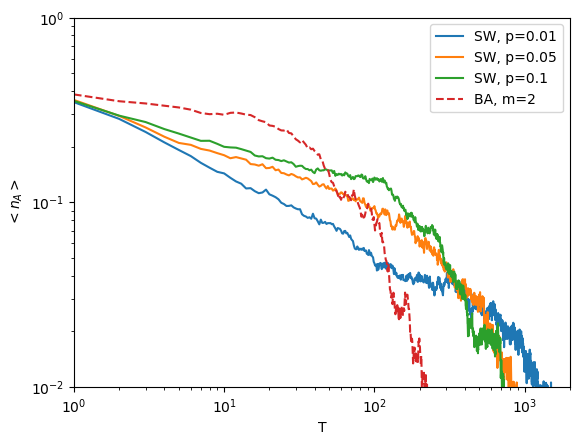

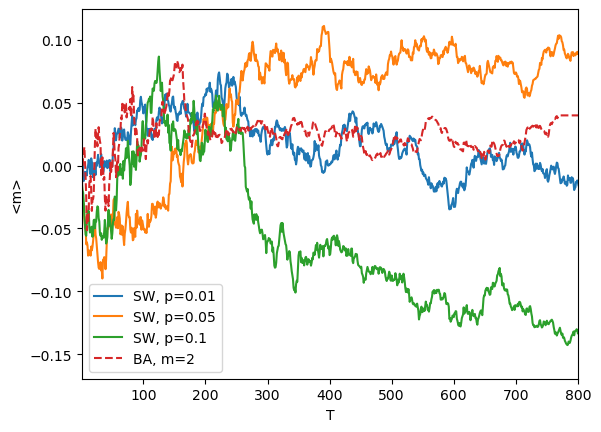

In [66]:
# Plot interface density for small-world
plt.figure()
for p, (_, nA) in sw.items():
    plt.plot(range(1, T+1), nA, label=f'SW, p={p}')
plt.plot(range(1, T+1), nA_ba, '--', label='BA, m=2')
plt.xlabel('T')
plt.ylabel(r'$<n_A>$')
#escala logaritmica
plt.yscale('log')
plt.xscale('log')
plt.xlim(1, 2000)
plt.ylim(1e-2, 1)

#plt.title('Watts–Strogatz pequeño mundo')
plt.legend()
plt.show()

# Plot magnetization for small-world (to check conservation)
plt.figure()
for p, (m, _) in sw.items():
    plt.plot(range(1, T+1), m, label=f'SW, p={p}')
plt.plot(range(1, T+1), m_ba, label='BA, m=2', linestyle='--')
plt.xlabel('T')
plt.ylabel('<m>')
#plt.title('Magnetización Watts–Strogatz')
plt.xlim(1, 800)
plt.legend()
plt.show()

